Make sure you use the right version number.

In [2]:
# %pip install --upgrade scikit-learn==0.23.0

Once installed, we can load the data.

In [9]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

Next, we can apply models! 

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([4.13164983, 3.97660644, 3.67657094])

In [40]:
from sklearn.neighbors import KNeighborsRegressor

mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)

array([181.4,  80.8, 150.8, 203.4, 119.4, 108. ,  83.6, 120.6, 127.8,
       187.8, 121.4, 129.6,  98.8, 166.8, 106.6, 144. , 174.4, 177.8,
       132.8, 142. ,  80. ,  73.4, 113.4, 273.8, 151.4, 126.4, 132. ,
       137.8, 107.2, 192.2, 154.6,  65. , 287.8,  78.6,  78.6, 109.6,
       175.2, 172.6, 235. ,  76.4, 158.6, 113.4,  97.6,  74. , 257. ,
        92.8, 163. , 150.2, 110.8, 145.4, 121.2, 152.4, 130.6,  94. ,
       157.2,  88.8, 137.2, 101. , 132.2, 156.6, 115. , 124. ,  65.8,
       132.4, 128.4, 154.4, 119.6,  88.8,  96.2, 136.6,  81.6, 234.6,
       174.4, 109.8, 133.2,  72. , 171.8, 106.6, 179.4, 121.6, 134.4,
       107.8,  69.2, 141.2,  80. , 108.6,  92.8, 124.6,  68.6, 110.6,
        95. , 136.4, 153.4,  82.8,  83.8, 126.8, 170.6, 165.8,  88.6,
       126.2, 158.8,  86.2, 151.8, 155.4, 139.4,  87. , 115. , 143.2,
       181. , 183. ,  71.2,  99.4, 134.8, 202. , 277.4, 165.4, 255.4,
       207. , 126.6, 132.2, 130. , 202. , 232.4, 158.2, 136.4, 166.4,
       111.6,  92.8,

Maybe we should inspect the results.

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Text(0, 0.5, 'True values')

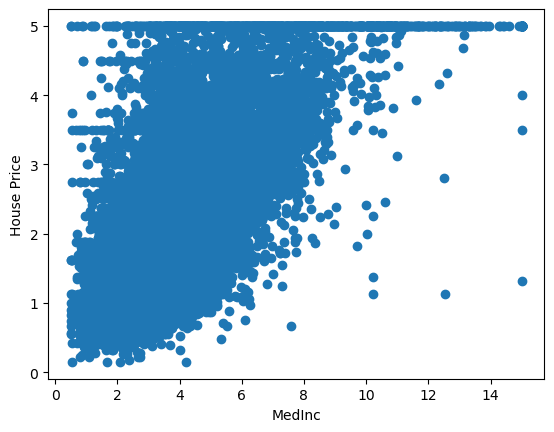

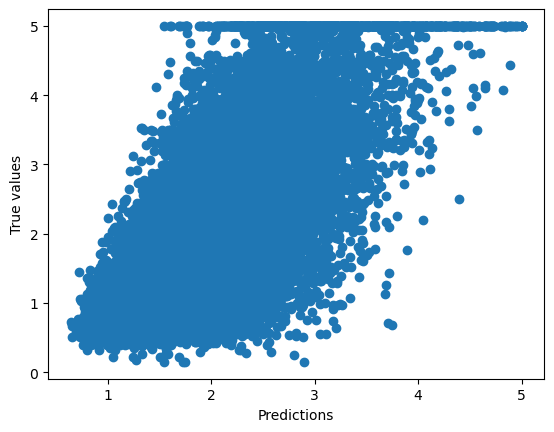

In [54]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

features = fetch_california_housing().feature_names
print(features)
N = 0 # index of feature want to plot
plt.figure()
plt.scatter(X[:,N],y)
plt.xlabel(features[N])
plt.ylabel('House Price')


plt.figure()
mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)
plt.xlabel('Predictions')
plt.ylabel('True values')

Let's put everything into a pipeline.

Text(0, 0.5, 'True values')

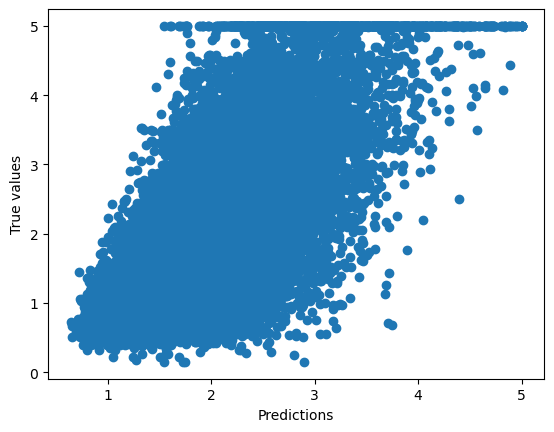

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt

# Load the diabetes dataset
X,y = fetch_california_housing(return_X_y=True)

model = KNeighborsRegressor().fit(X,y)
pred = model.predict(X)
plt.scatter(pred,y)
plt.xlabel('Predictions')
plt.ylabel('True values')




{'memory': None, 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=10))], 'verbose': False, 'scale': StandardScaler(), 'model': KNeighborsRegressor(n_neighbors=10), 'scale__copy': True, 'scale__with_mean': True, 'scale__with_std': True, 'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__metric_params': None, 'model__n_jobs': None, 'model__n_neighbors': 10, 'model__p': 2, 'model__weights': 'uniform'}


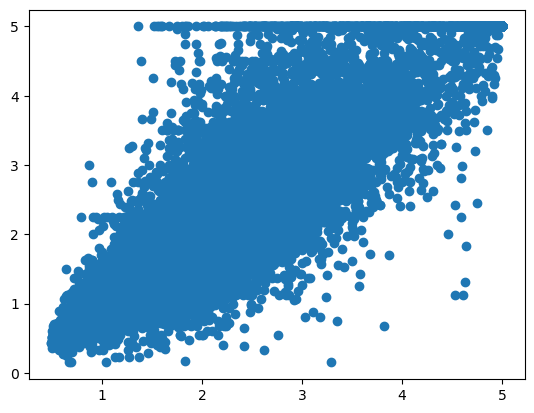

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = fetch_california_housing(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=10))
])
#print(pipe.get_params())
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [68]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)

mod.fit(X, y)

{'cv': 3, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=10))], 'estimator__verbose': False, 'estimator__scale': StandardScaler(), 'estimator__model': KNeighborsRegressor(n_neighbors=10), 'estimator__scale__copy': True, 'estimator__scale__with_mean': True, 'estimator__scale__with_std': True, 'estimator__model__algorithm': 'auto', 'estimator__model__leaf_size': 30, 'estimator__model__metric': 'minkowski', 'estimator__model__metric_params': None, 'estimator__model__n_jobs': None, 'estimator__model__n_neighbors': 10, 'estimator__model__p': 2, 'estimator__model__weights': 'uniform', 'estimator': Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=10))]), 'n_jobs': None, 'param_grid': {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}


In [70]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004557,0.001073,0.117142,0.008306,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.003543,0.000058,0.127652,0.010518,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.003752,0.000322,0.140236,0.012843,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.003593,0.000090,0.146560,0.010871,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.003582,0.000044,0.153004,0.011479,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.003595,0.000111,0.157920,0.010698,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.003516,0.000079,0.163368,0.012988,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.003480,0.000071,0.167047,0.011550,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.003448,0.000019,0.170491,0.011471,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.003435,0.000038,0.174604,0.011811,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


Finally, lets remember that we should look at the data.

In [71]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived